In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.models import load_model
from numpy import load
from numpy import zeros
from numpy import ones
from PIL import Image

In [2]:
model_path = "g__model_4.h5"
g_model = load_model(model_path)

C:\python3.10\lib\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [3]:
def generate_real_samples(image_path):
    desired_width = 256
    desired_height = 256

    gray_image = []

    image = Image.open(image_path)
    image = image.resize((desired_width, desired_height))
    image_gray = image.convert('L')  # Convert to grayscale
    image_gray = np.array(image_gray)

    image_gray =  np.expand_dims(image_gray, axis=-1)

    image_gray = image_gray.astype(np.float32) / 255.0  # Normalize pixel values to [0, 1]
    image_gray = (image_gray - 0.5) * 2  # Scale pixel values to [-1, 1]
    # Append the loaded image to the list
    gray_image.append(image_gray)
    gray_image=np.array(gray_image)
    return gray_image

In [4]:
def plot_image(real,generated):
    plt.figure(figsize=(10, 5))
    # Plot the color image
    plt.subplot(1, 2, 1)
    plt.imshow(real, cmap='gray')
    plt.title('Original Image')

    plt.axis('off')  # Turn off axis labels and ticks

    # Plot the grayscale image
    plt.subplot(1, 2, 2)
    plt.imshow(generated)
    plt.title('Colored Image')
    plt.axis('off')  # Turn off axis labels and ticks

    # Show the combined plot
    plt.tight_layout()
    plt.show()

In [5]:
# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, samples):
    # generate fake instance
    gray_image = generate_real_samples(samples)
    print(gray_image.shape)
    X = g_model.predict(gray_image)
    plot_image(gray_image[0],X[0])

(1, 256, 256, 1)
1/1 [==============================] - 5s 5s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


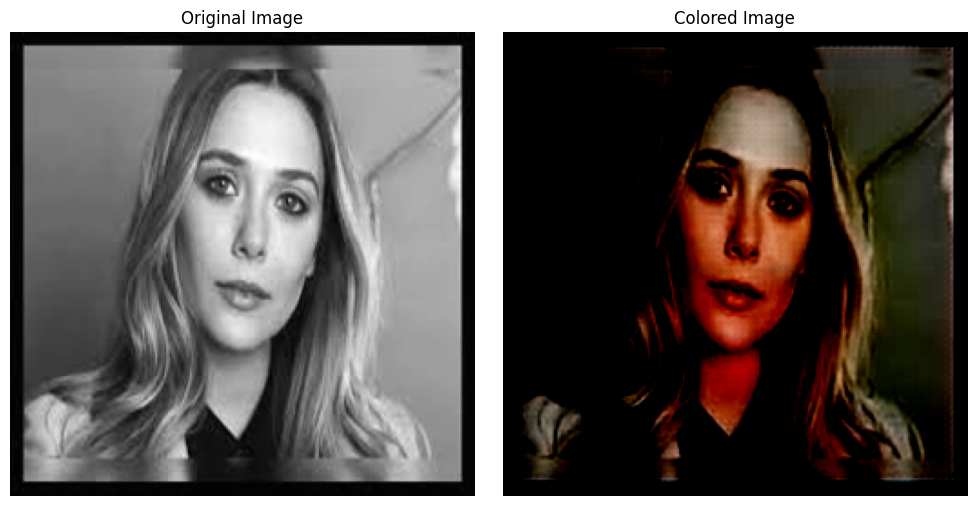

In [6]:
path = "image/eliza4.jpg"
generate_fake_samples(g_model,path)